In [55]:
# Importer les bibliothèques nécessaires
import pandas as pd  # Manipulation des données
import numpy as np   # Calculs mathématiques
import matplotlib.pyplot as plt  # Visualisation
import seaborn as sns  # Visualisation avancée
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [17]:
file_path = "/BankChurners.csv"
df = pd.read_csv(file_path)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [18]:
# Vérifier s'il y a des valeurs manquantes
df.isnull().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0


In [19]:
# Vérifier s'il y a des doublons
print("Nombre de doublons :", df.duplicated().sum())

# Supprimer les doublons s'il y en a
df = df.drop_duplicates()


Nombre de doublons : 0


In [20]:
df = df.drop(columns=[
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"
], errors="ignore")  # Avoid errors if they are already deleted
df = df.drop(columns=["CLIENTNUM"], errors="ignore")

# Check if the columns are gone
print(df.columns)


Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


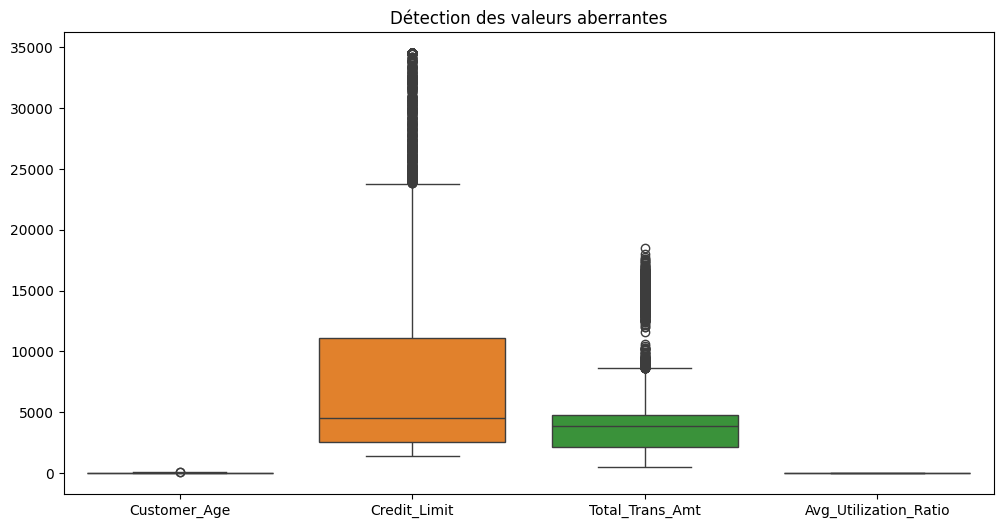

In [24]:
# Tracer des boxplots pour détecter les valeurs extrêmes
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["Customer_Age", "Credit_Limit", "Total_Trans_Amt", "Avg_Utilization_Ratio"]])
plt.title("Détection des valeurs aberrantes")
plt.show()


In [31]:
# Check for negative or zero values in key financial columns
columns_to_check = ["Credit_Limit", "Total_Trans_Amt", "Avg_Utilization_Ratio"]

# Create an empty dictionary to store results
unrealistic_values = {}

for col in columns_to_check:
    negative_count = (df[col] < 0).sum()
    zero_count = (df[col] == 0).sum()

    unrealistic_values[col] = {
        "Negative Values": negative_count,
        "Zero Values": zero_count
    }

# Convert dictionary to DataFrame for better display
unrealistic_summary = pd.DataFrame(unrealistic_values)

# Print the summary
print("🔍 Unrealistic Values in the Dataset:")
print(unrealistic_summary)

🔍 Unrealistic Values in the Dataset:
                 Credit_Limit  Total_Trans_Amt  Avg_Utilization_Ratio
Negative Values             0                0                      0
Zero Values                 0                0                   2470


<ipython-input-36-acdf83edbcfd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=["purple", "pink"])


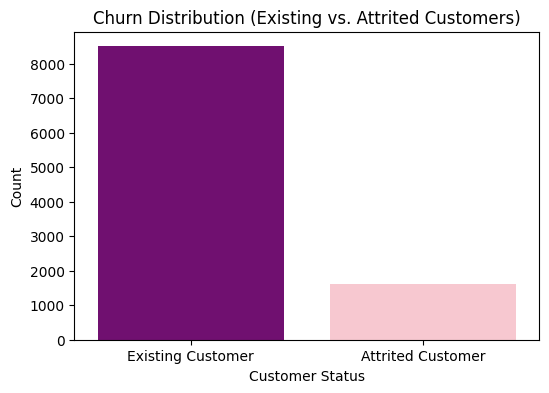

In [36]:
# Count churned vs. non-churned customers
churn_counts = df["Attrition_Flag"].value_counts()
# Plot the churn distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=["purple", "pink"])
plt.xlabel("Customer Status")
plt.ylabel("Count")
plt.title("Churn Distribution (Existing vs. Attrited Customers)")
plt.show()

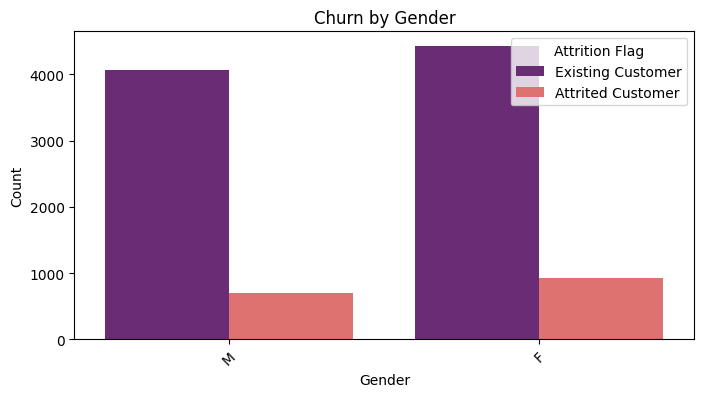

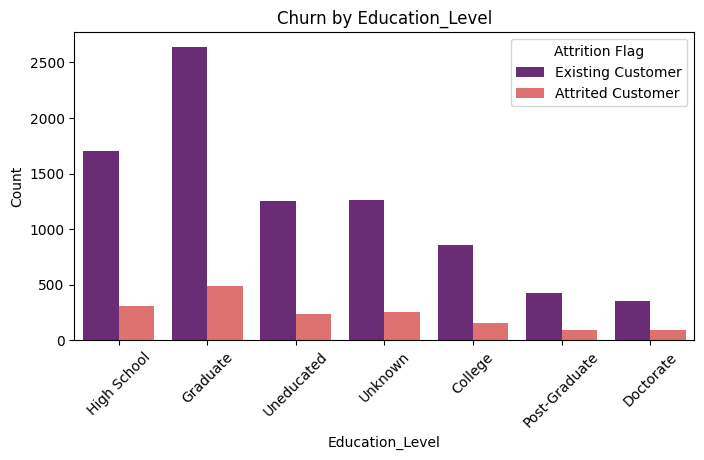

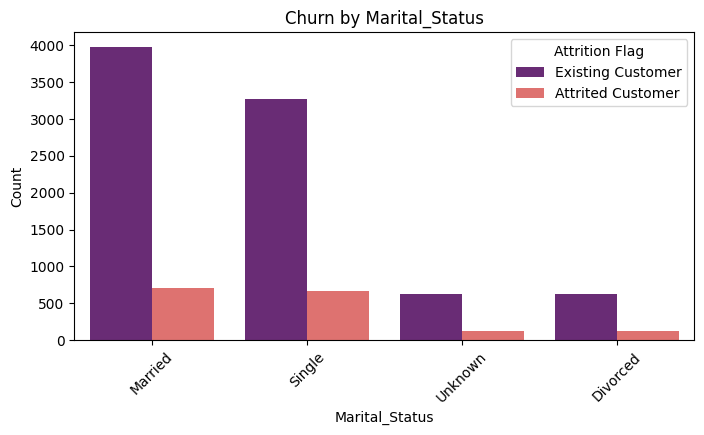

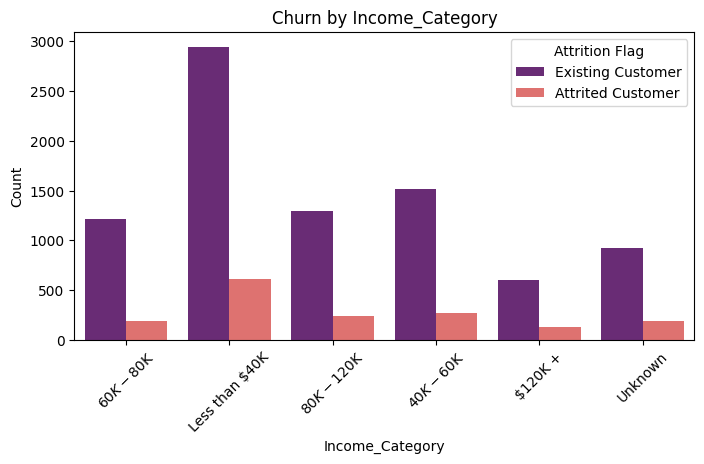

In [35]:
# Define categorical columns
categorical_features = ["Gender", "Education_Level", "Marital_Status", "Income_Category"]

# Create plots for each categorical variable
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=feature, hue="Attrition_Flag", palette="magma")
    plt.xticks(rotation=45)
    plt.title(f"Churn by {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend(title="Attrition Flag", labels=["Existing Customer", "Attrited Customer"])
    plt.show()


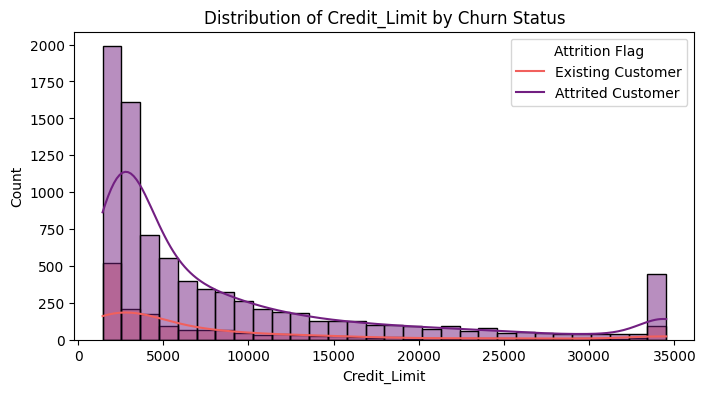

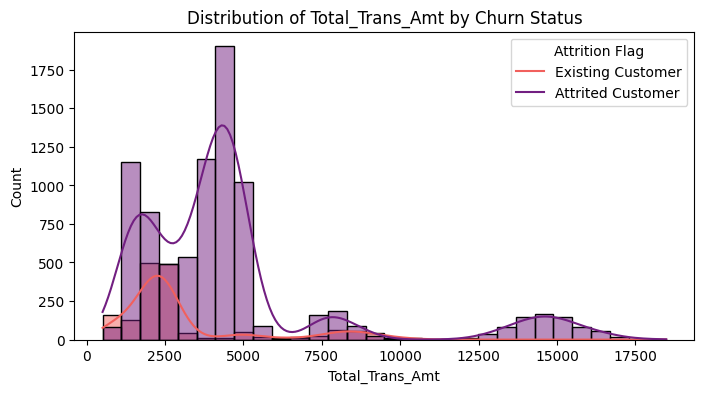

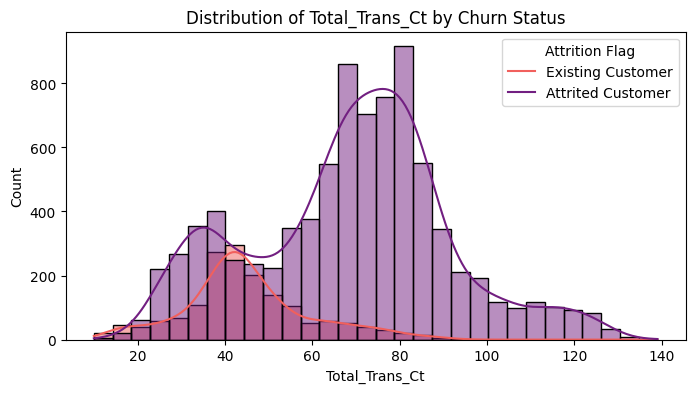

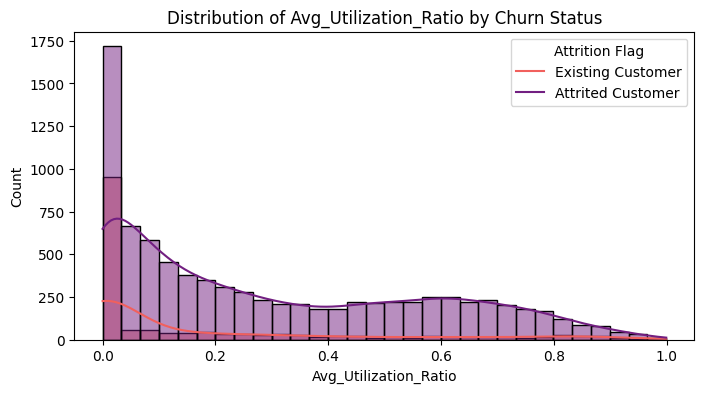

In [37]:
# Define numerical columns for analysis
numerical_features = ["Credit_Limit", "Total_Trans_Amt", "Total_Trans_Ct", "Avg_Utilization_Ratio"]

# Create histograms to compare churned vs. non-churned customers
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=feature, hue="Attrition_Flag", kde=True, palette="magma", bins=30)
    plt.title(f"Distribution of {feature} by Churn Status")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend(title="Attrition Flag", labels=["Existing Customer", "Attrited Customer"])
    plt.show()


<ipython-input-38-56fb5194f89d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Attrition_Flag", y=feature, palette="viridis")


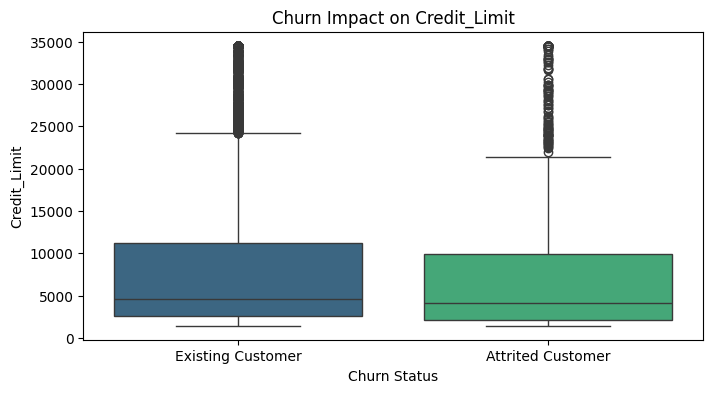

<ipython-input-38-56fb5194f89d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Attrition_Flag", y=feature, palette="viridis")


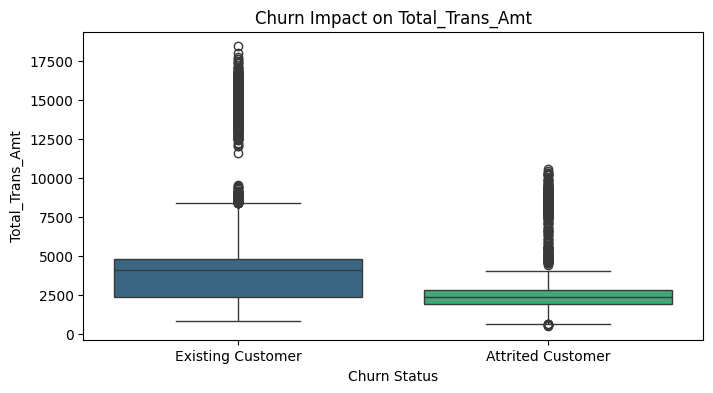

<ipython-input-38-56fb5194f89d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Attrition_Flag", y=feature, palette="viridis")


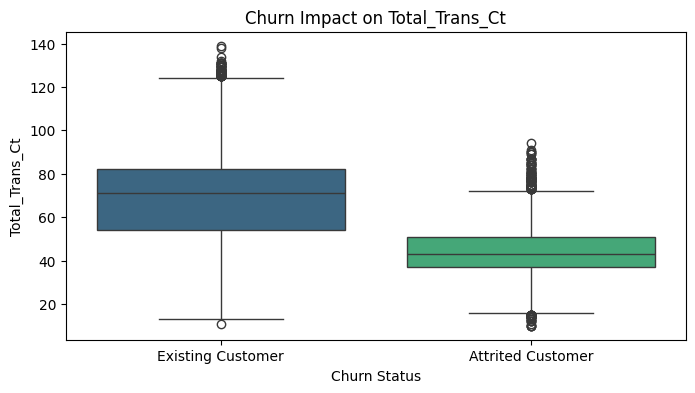

<ipython-input-38-56fb5194f89d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Attrition_Flag", y=feature, palette="viridis")


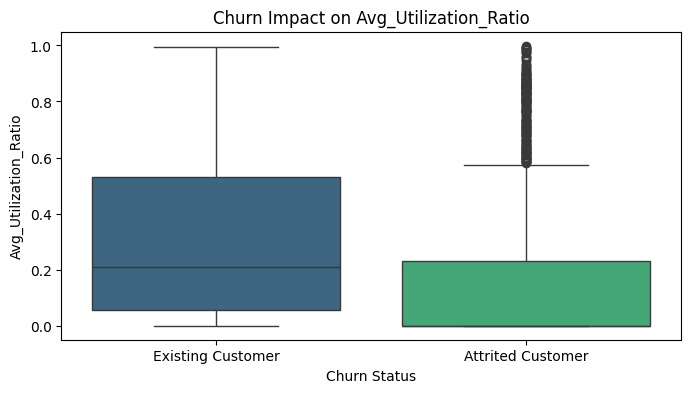

In [38]:
# Create boxplots for numerical features
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x="Attrition_Flag", y=feature, palette="viridis")
    plt.title(f"Churn Impact on {feature}")
    plt.xlabel("Churn Status")
    plt.ylabel(feature)
    plt.xticks(ticks=[0, 1], labels=["Existing Customer", "Attrited Customer"])
    plt.show()


In [22]:
import pandas as pd
# Show first rows to confirm the dataset is loaded correctly

# Define categorical columns to encode
categorical_features = ["Gender", "Education_Level", "Marital_Status", "Income_Category", "Card_Category"]

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Show first rows to verify encoding
print(df_encoded.head())


      Attrition_Flag  Customer_Age  Dependent_count  Months_on_book  \
0  Existing Customer            45                3              39   
1  Existing Customer            49                5              44   
2  Existing Customer            51                3              36   
3  Existing Customer            40                4              34   
4  Existing Customer            40                3              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  ...  \
0       12691.0                  777      

In [23]:
# Convert Attrition_Flag to 0 (Existing) and 1 (Churned)
df_encoded["Attrition_Flag"] = df_encoded["Attrition_Flag"].apply(lambda x: 1 if x == "Attrited Customer" else 0)

# Show first rows to verify
print(df_encoded["Attrition_Flag"].value_counts())  # Should show 0s and 1s


Attrition_Flag
0    8500
1    1627
Name: count, dtype: int64


In [28]:
# Define numerical columns to scale
numerical_features = ["Customer_Age", "Credit_Limit", "Total_Trans_Amt", "Total_Trans_Ct", "Avg_Utilization_Ratio"]

# Initialize StandardScaler
scaler = StandardScaler()

# Apply transformation to numerical features
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# Show first rows to verify scaling
print(df_encoded.head())

   Attrition_Flag  Customer_Age  Dependent_count  Months_on_book  \
0               0     -0.165406                3              39   
1               0      0.333570                5              44   
2               0      0.583058                3              36   
3               0     -0.789126                4              34   
4               0     -0.789126                3              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  ...  \
0      0.446622                  777          11914.0  ...  

In [31]:
# Define features (X) and target variable (y)
X = df_encoded.drop(columns=["Attrition_Flag"])  # Features
y = df_encoded["Attrition_Flag"]  # Target (0 = No Churn, 1 = Churn)

# Split into training & testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Show dataset sizes
print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")

Training Set: (8101, 32), Testing Set: (2026, 32)


In [36]:
# Initialize Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
model = LogisticRegression(random_state=42, max_iter=500)  # Increase iterations

print(f" Model Accuracy: {accuracy:.4f}")

# Display classification report
print("\n Classification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("\n Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


 Model Accuracy: 0.8875

 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1701
           1       0.73      0.48      0.58       325

    accuracy                           0.89      2026
   macro avg       0.82      0.72      0.76      2026
weighted avg       0.88      0.89      0.88      2026


 Confusion Matrix:
[[1642   59]
 [ 169  156]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
# Initialize Support Vector Machine model
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f" SVM Accuracy: {accuracy_svm:.4f}")

# Display classification report
print("\n Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Display confusion matrix
print("\n Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


 SVM Accuracy: 0.8396

 Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1701
           1       0.00      0.00      0.00       325

    accuracy                           0.84      2026
   macro avg       0.42      0.50      0.46      2026
weighted avg       0.70      0.84      0.77      2026


 Confusion Matrix:
[[1701    0]
 [ 325    0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [40]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f" Random Forest Accuracy: {accuracy_rf:.4f}")

# Display classification report
print("\n Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Display confusion matrix
print("\n Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


 Random Forest Accuracy: 0.9541

 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1701
           1       0.93      0.77      0.84       325

    accuracy                           0.95      2026
   macro avg       0.95      0.88      0.91      2026
weighted avg       0.95      0.95      0.95      2026


 Confusion Matrix:
[[1683   18]
 [  75  250]]


In [42]:
!pip install xgboost
# Initialize XGBoost model
xgb_model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f" XGBoost Accuracy: {accuracy_xgb:.4f}")

# Display classification report
print("\n Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Display confusion matrix
print("\n Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:55:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


 XGBoost Accuracy: 0.9679

 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1701
           1       0.93      0.87      0.90       325

    accuracy                           0.97      2026
   macro avg       0.95      0.93      0.94      2026
weighted avg       0.97      0.97      0.97      2026


 Confusion Matrix:
[[1679   22]
 [  43  282]]


In [45]:
!pip install lightgbm
# Initialize LightGBM model
lgbm_model = LGBMClassifier(n_estimators=100, random_state=42)

# Train the model
lgbm_model.fit(X_train, y_train)

# Make predictions
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluate performance
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f" LightGBM Accuracy: {accuracy_lgbm:.4f}")

# Display classification report
print("\n Classification Report:")
print(classification_report(y_test, y_pred_lgbm))

# Display confusion matrix
print("\n Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgbm))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1302, number of negative: 6799
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2058
[LightGBM] [Info] Number of data points in the train set: 8101, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.160721 -> initscore=-1.652874
[LightGBM] [Info] Start training from score -1.652874
 LightGBM Accuracy: 0.9709

 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1701
           1       0.94      0.88      0.91       325

    accuracy                           0.97      2026
   macro avg       0.96      0.93      0.94      2026
weighted avg       0.97      0.97      0.

<ipython-input-49-c870c76fc385>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.Importance[:15], y=feature_importances.Feature[:15], palette="viridis")


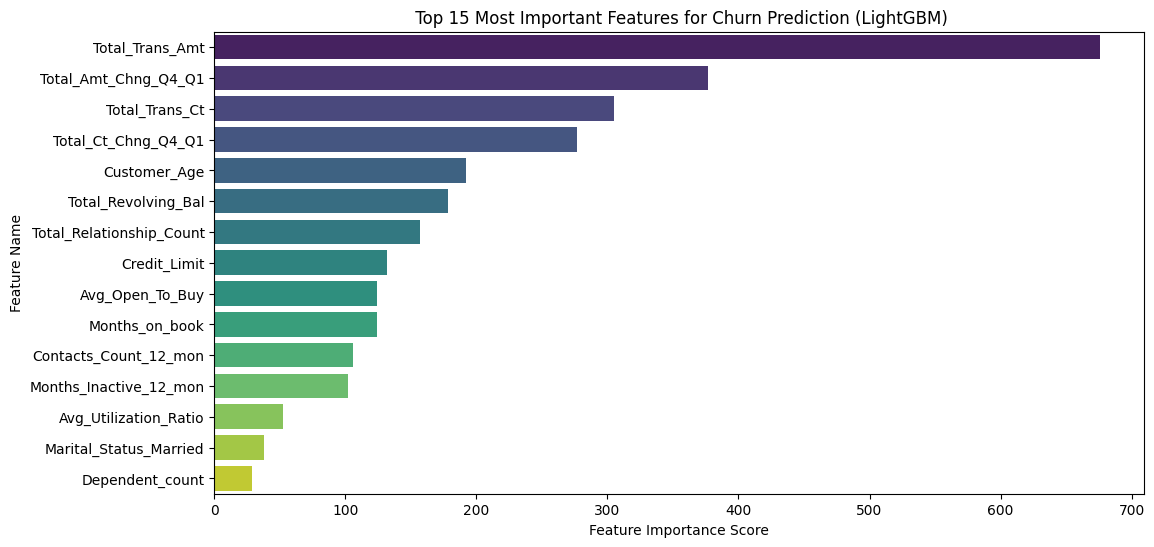

In [49]:
# Get feature importance from the LightGBM model
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': lgbm_model.feature_importances_})

# Sort features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the top 15 most important features
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances.Importance[:15], y=feature_importances.Feature[:15], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature Name")
plt.title(" Top 15 Most Important Features for Churn Prediction (LightGBM)")
plt.show()


In [52]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'learning_rate': [0.01, 0.05, 0.1],  # Step size for updating weights
    'max_depth': [5, 10, 15],  # Maximum depth of trees
    'num_leaves': [20, 30, 40],  # More leaves = more complexity
    'min_child_samples': [10, 20, 30]  # Minimum samples in child nodes
}

# Initialize LightGBM model
lgbm = LGBMClassifier(random_state=42)

# Grid Search with 3-fold cross-validation
grid_search = GridSearchCV(lgbm, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f" Best Parameters: {best_params}")

# Train LightGBM with best parameters
best_lgbm = LGBMClassifier(**best_params, random_state=42)
best_lgbm.fit(X_train, y_train)

# Make predictions
y_pred_best = best_lgbm.predict(X_test)

# Evaluate performance
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f" Optimized LightGBM Accuracy: {accuracy_best:.4f}")

# Display classification report
print("\n Classification Report:")
print(classification_report(y_test, y_pred_best))

# Display confusion matrix
print("\n Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))


Fitting 3 folds for each of 243 candidates, totalling 729 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1302, number of negative: 6799
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2058
[LightGBM] [Info] Number of data points in the train set: 8101, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.160721 -> initscore=-1.652874
[LightGBM] [Info] Start training from score -1.652874
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

In [56]:
# Initialize Multi-Layer Perceptron (MLP) model
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam',
                          max_iter=300, random_state=42)

# Train the model
mlp_model.fit(X_train, y_train)

# Make predictions
y_pred_mlp = mlp_model.predict(X_test)

# Evaluate performance
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f" MLP Accuracy: {accuracy_mlp:.4f}")

# Display classification report
print("\n Classification Report:")
print(classification_report(y_test, y_pred_mlp))

# Display confusion matrix
print("\n Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_mlp))


 MLP Accuracy: 0.8465

 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1701
           1       0.58      0.15      0.24       325

    accuracy                           0.85      2026
   macro avg       0.72      0.57      0.58      2026
weighted avg       0.81      0.85      0.81      2026


 Confusion Matrix:
[[1665   36]
 [ 275   50]]
